## Demo CI notebook using Seaborn iris data

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

### Read demo data from package

In [2]:
data_df = sns.load_dataset('iris')
data_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
data_df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [4]:
data_df.groupby('species').std()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,0.352490,0.379064,0.173664,0.105386
versicolor,0.516171,0.313798,0.469911,0.197753
virginica,0.635880,0.322497,0.551895,0.274650


### Some plots

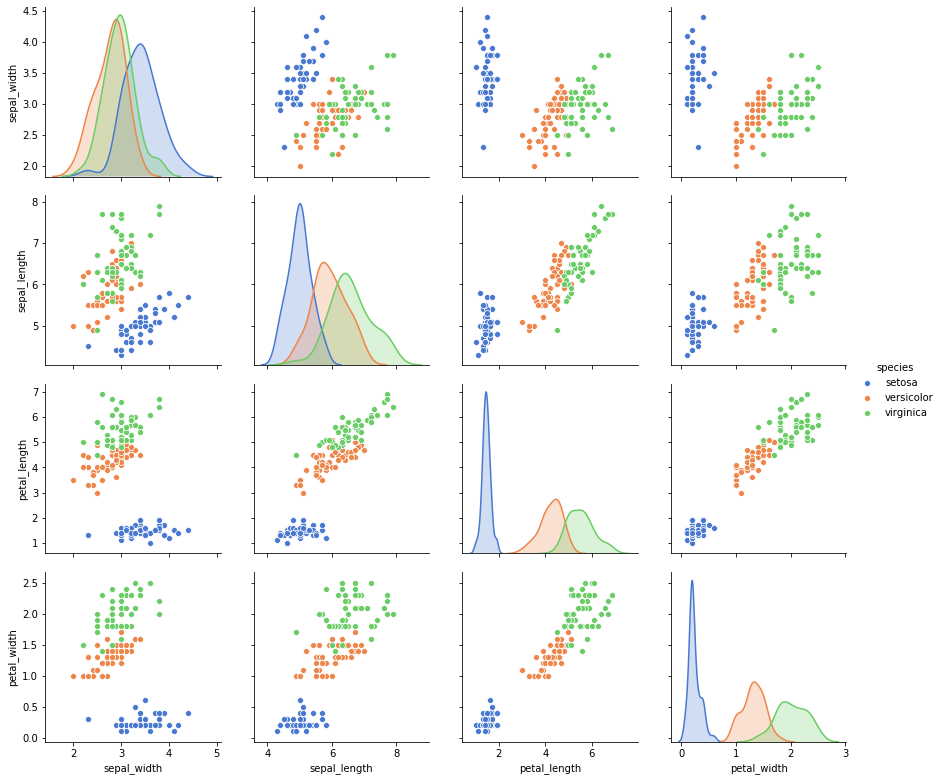

In [5]:
plot = sns.pairplot(
    data_df,
    hue='species',
    palette="muted",
    height=3,
    vars=['sepal_width', 'sepal_length', 'petal_length', 'petal_width'],
    kind='scatter'
)
plt.subplots_adjust(top=0.9)

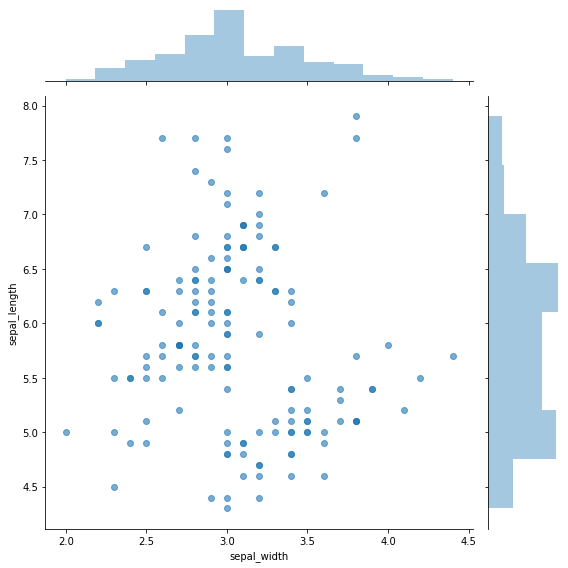

In [6]:
plot = sns.jointplot(x='sepal_width', y='sepal_length', data=data_df, height=8, alpha=.6)

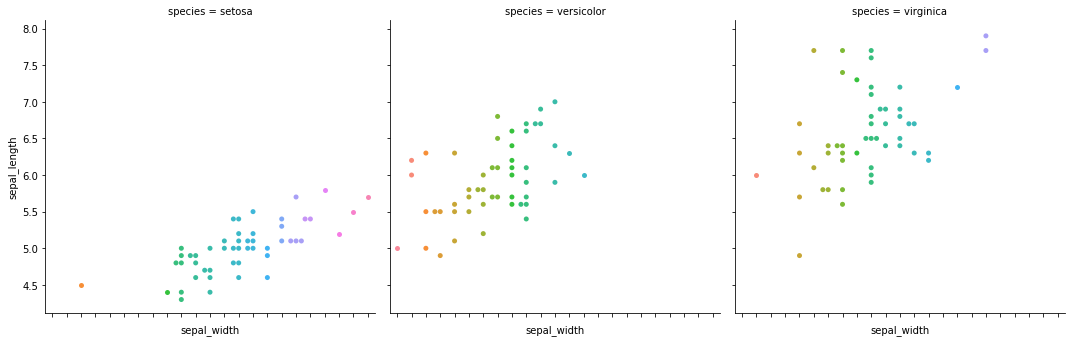

In [7]:
plot = sns.catplot(x="sepal_width", y="sepal_length", col="species", data=data_df, kind="swarm");
plot.set(xticklabels=[]);

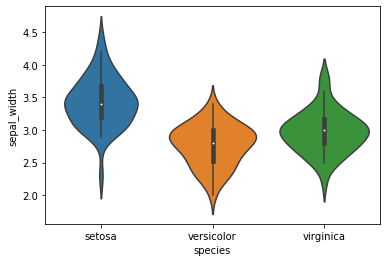

In [8]:
plot = sns.violinplot(x='species',y='sepal_width',data=data_df)

### Some model

In [9]:
TARGET = 'species'
X_train, X_test, y_train, y_test = train_test_split(data_df.drop(TARGET, axis=1), data_df[TARGET], test_size=0.2, random_state=42)

In [10]:
model = LogisticRegression(solver='liblinear', multi_class='auto')

In [11]:
def train_and_report(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(type(model))
    print(f'Accuracy score: {accuracy_score(y_test, preds)}')
    print(classification_report(y_test, preds))
    return model, preds

In [12]:
fitted, preds = train_and_report(model, X_train, X_test, y_train, y_test)

<class 'sklearn.linear_model.logistic.LogisticRegression'>
Accuracy score: 1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [13]:
model = RandomForestClassifier(n_estimators=10)

In [14]:
fitted, preds = train_and_report(model, X_train, X_test, y_train, y_test)

<class 'sklearn.ensemble.forest.RandomForestClassifier'>
Accuracy score: 1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

